In [89]:
import pandas as pd
data = pd.read_csv("data/file.csv", encoding='latin-1')

In [90]:
datas = data[data["Unit_x"] == "tonnes"]
datas = datas.drop("Domain", axis= 1)
datas = datas[datas["Item_x"] == "Rice"]
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item_x", axis=1)
datas = datas[datas["Item_y"] == "Pesticides (total)"]
datas = datas.drop("Item_y", axis=1)
datas = datas.drop("Element_y", axis=1)
datas = datas.drop("Element_x", axis=1)
datas = datas.drop("Unit_x", axis=1)


In [91]:
datas.dtypes

Area                 object
Year                  int64
rain                float64
avg_temp            float64
yield_amound        float64
pesticide_amound    float64
dtype: object

In [92]:
datas

,Area,Year,rain,avg_temp,yield_amound,pesticide_amound
341,Angola,1990,1010.0,24.12,3000.00,64.00
933,Albania,1990,1485.0,16.37,7000.00,121.00
1762,Argentina,1990,591.0,17.46,428100.00,26156.00
2610,Argentina,1990,591.0,17.67,428100.00,26156.00
3220,Australia,1990,534.0,16.80,924000.00,17866.42
...,...,...,...,...,...,...
5938251,South Africa,2013,495.0,21.31,3000.00,26857.00
5938833,South Africa,2013,495.0,14.98,3000.00,26857.00
5939415,South Africa,2013,495.0,18.00,3000.00,26857.00
5939997,South Africa,2013,495.0,14.98,3000.00,26857.00


In [93]:
from sklearn.preprocessing import OneHotEncoder
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)


Linear Regression

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
# Extract features (X) 
# target variable (y)
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 51967410553201.61


In [95]:
import seaborn as sns

<Axes: xlabel='yield_amound'>

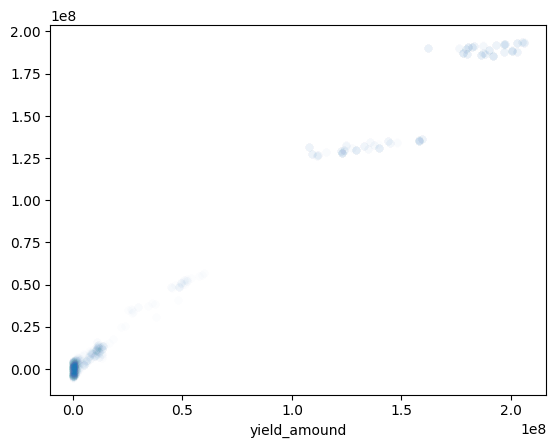

In [96]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

<Axes: xlabel='yield_amound', ylabel='Count'>

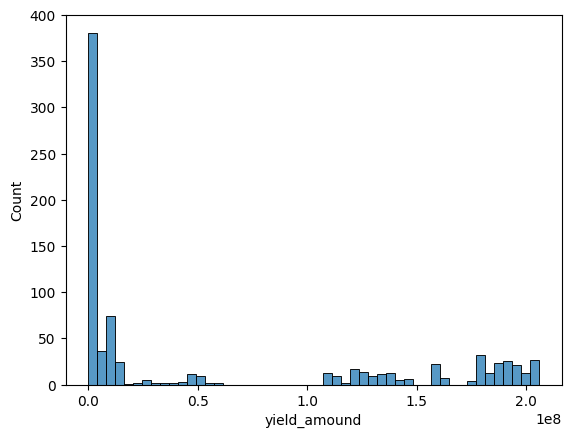

In [97]:
sns.histplot( data= y_test, bins=50)

<Axes: ylabel='Count'>

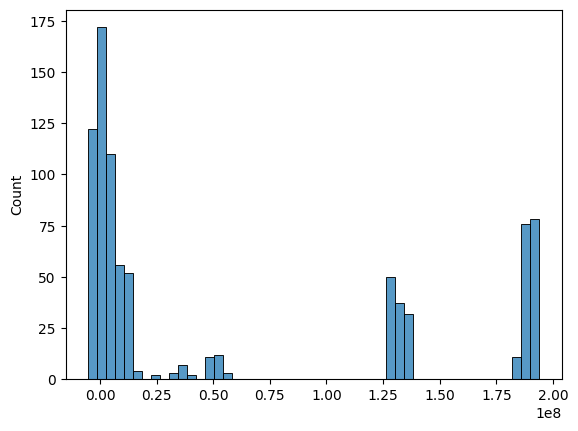

In [98]:
sns.histplot( data= y_pred, bins=50)

Lasso

In [99]:
from sklearn.linear_model import Lasso

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso(alpha=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 51935536339232.695


c:\Users\Lucas\miniconda3\envs\Pythonuse\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.495e+16, tolerance: 2.012e+15
  model = cd_fast.enet_coordinate_descent(


<Axes: xlabel='yield_amound'>

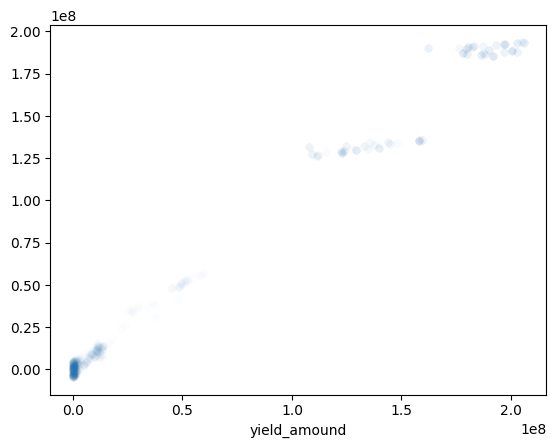

In [100]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

Gradiant Boosting Regressor 

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 5409922421749.138


<Axes: xlabel='yield_amound'>

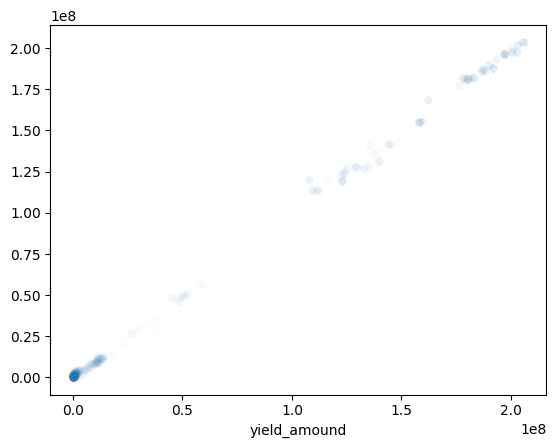

In [102]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

Random forest regression

In [103]:
from sklearn.ensemble import RandomForestRegressor

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 33427437112.196934


<Axes: xlabel='yield_amound'>

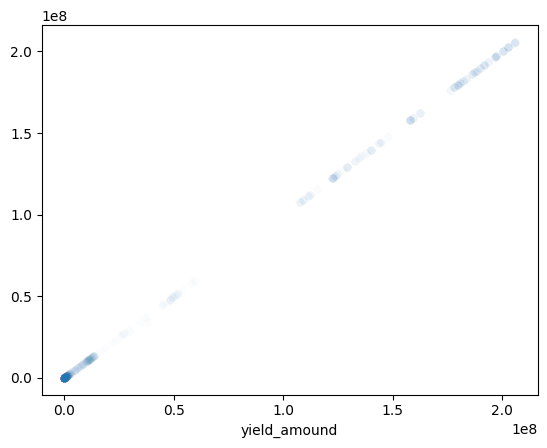

In [104]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

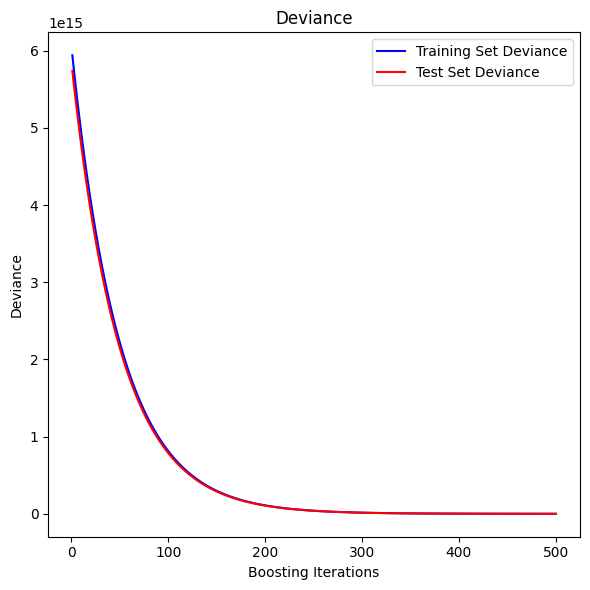

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 2,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))

est = GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.1, max_depth=5, random_state=0,
    loss='squared_error'
).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


In [106]:
y_pred =  est.predict(X)

In [107]:
y_pred

array([-39665.95723351,   4956.14332316, 399364.36723428, ...,
        24290.86628567,  28567.67754889,  27546.17671901])

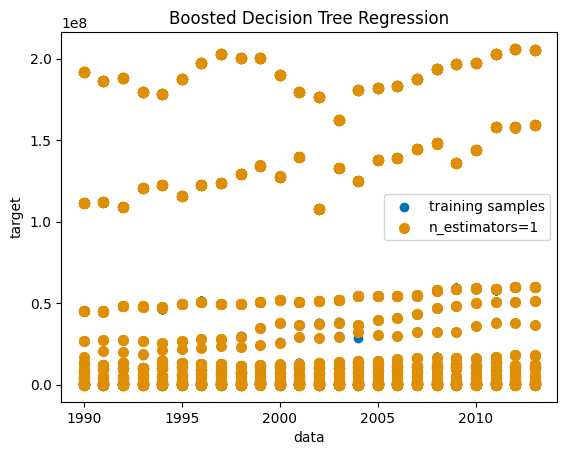

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred =  est.predict(X)
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X["Year"], y, color=colors[0], label="training samples")
plt.scatter(X["Year"], y_pred, color=colors[1], label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

<Axes: xlabel='Year', ylabel='yield_amound'>

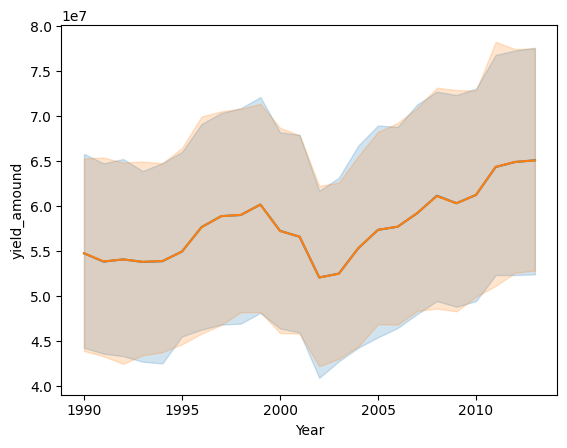

In [123]:
import seaborn as sns
fig, ax = plt.subplots()
sns.lineplot(x = X["Year"], y = y, ax=ax) # first dataset
sns.lineplot(x = X["Year"], y = y_pred, ax=ax) # first dataset

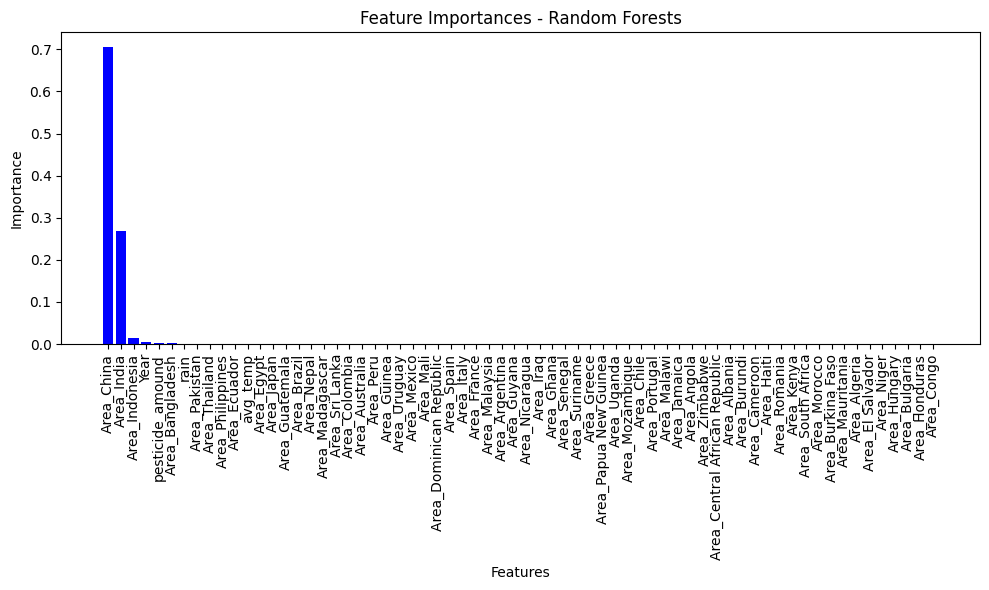

In [110]:
from sklearn.inspection import permutation_importance
# Get feature importances
importances = model.feature_importances_
# Calculate Permutation Importance on the test set
results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)
importances_test = results.importances_mean
# Get feature names
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forests")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()


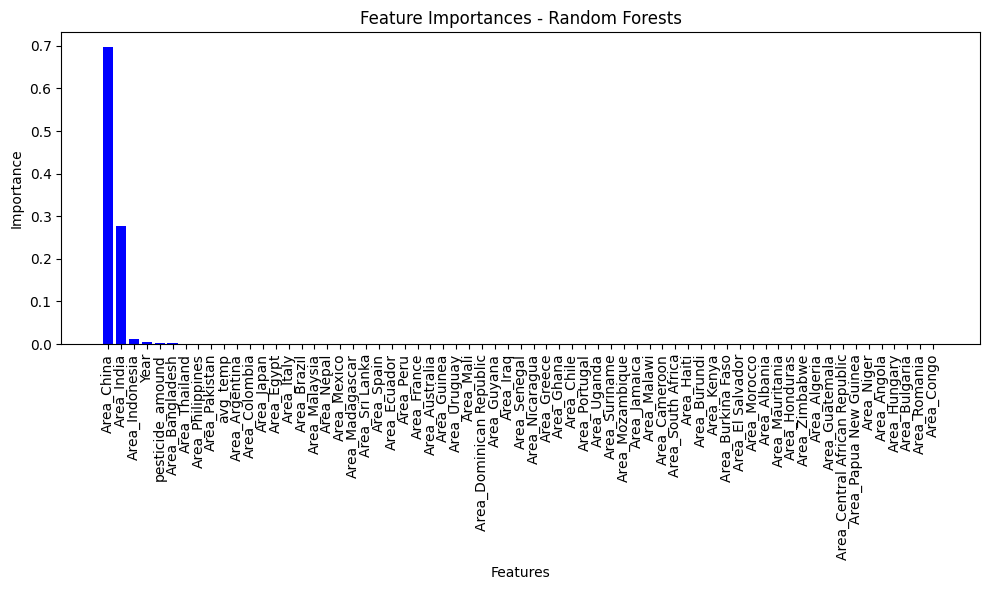

In [ ]:
from sklearn.inspection import permutation_importance
# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forests")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()